In [9]:
# import libraries for EDA (Exploratory Data Analysis)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
# Returns a list of physical devices visible to host. 
# Using GPU acceleration

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [11]:
# Load in training and testing dataset (link to dataset: https://www.kaggle.com/datasets/shayanfazeli/heartbeat)

train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

### Beginning EDA 

In [12]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


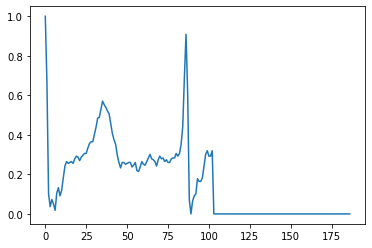

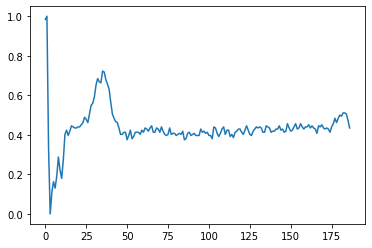

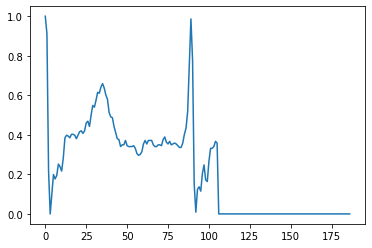

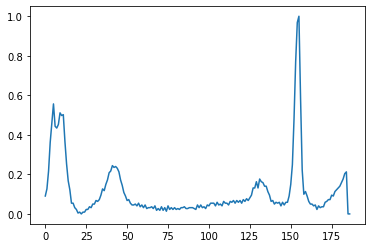

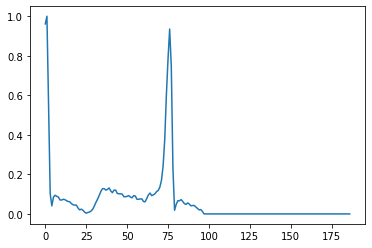

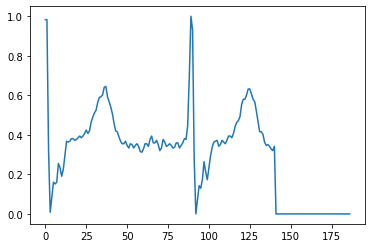

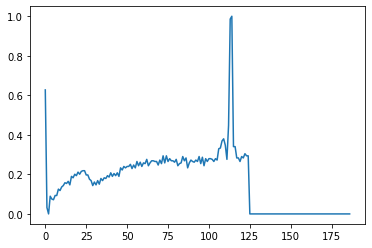

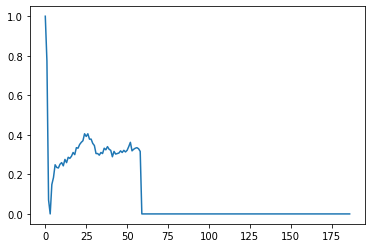

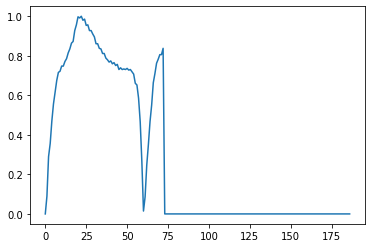

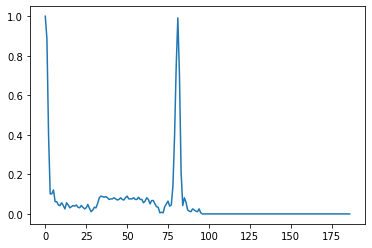

In [13]:
# Displaying ECG data from 'S' atrial ectopic beats class
# The dataset has been cropped, downsampled, and padded with zeroes to keep a fixed dimension
# The ECG data looks concerning at first glance but high classification results have already been made with it. Onwards.

for i in range(10):
    plt.plot(train[train[187] == 1.0].iloc[i,:187])
    plt.show()

In [14]:
# Exploring the distribution of classes in the training set.

train[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

##### The distribution is concerning. In theory, implimenting an upsampling technique to equalize the size of the classes will help the classification results. We will approach this a bit unconvientially, where we will first focus on obtaining the best architecture for our Neural Network. After that, we will upsample the data to observe any potential increase in classification.

In [15]:
# Confirming the shape of the dataset. 

train.iloc[:,:187].values.shape

(87554, 187)